# Exploratory Data Analysis

## Contexto

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

Usare un modelo Decision Tree para establecer las correlaciones y de esta manera saber el proceso por el que se ha llegado a determinadas decisiones.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
import json

## Importado de datos

In [12]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

df = pd.read_csv(url, sep= ',')

df.to_csv('../data/raw/Data.csv', index = False )

In [13]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [16]:
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='count'>

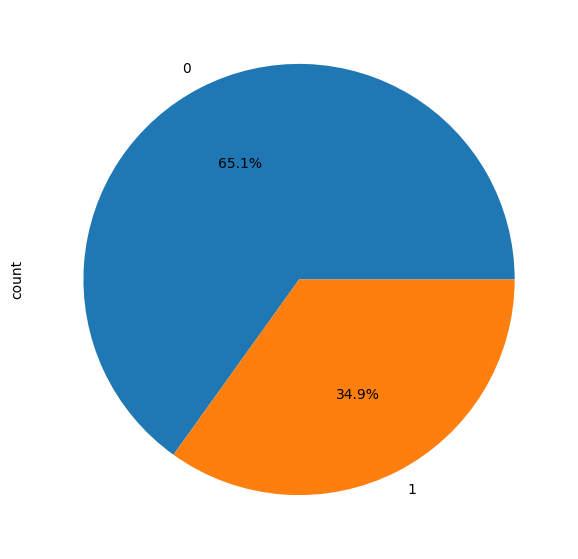

In [17]:
def plot_pie(dataset, target, size=(7,7)):
    return dataset[target].value_counts().plot.pie(autopct = '%1.1f%%', figsize=size)

plot_pie(df, 'Outcome')

Con estas primeras observaciones de mi dataset, puedo concluir que no dispongo de valores nulos o valores duplicados. 

En este caso no tengo columnas no relacionadas con mi target, no excluire ninguna.

In [18]:
# Renombro mi columna Outcome a target para clarificar.

df.rename(columns={'Outcome': 'target'}, inplace=True)

# Analisis de variables

## Analisis variables numericas

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'target'],
      dtype='object')

Entendemos que todos los sujetos de los que tenemos informacion en este dataset son mujeres, dado que obtenemos la variable pregnancies. Esto servira en un futuro en el caso de que algunos valores sean nulos con valor 0 o erroneos(incompatibles con la vida), dado que tendremos que imputarlos por la media y necesitamos saber el minimo valor a partir del cual los consideraremos erroneos y esto varia entre hombres y mujeres.

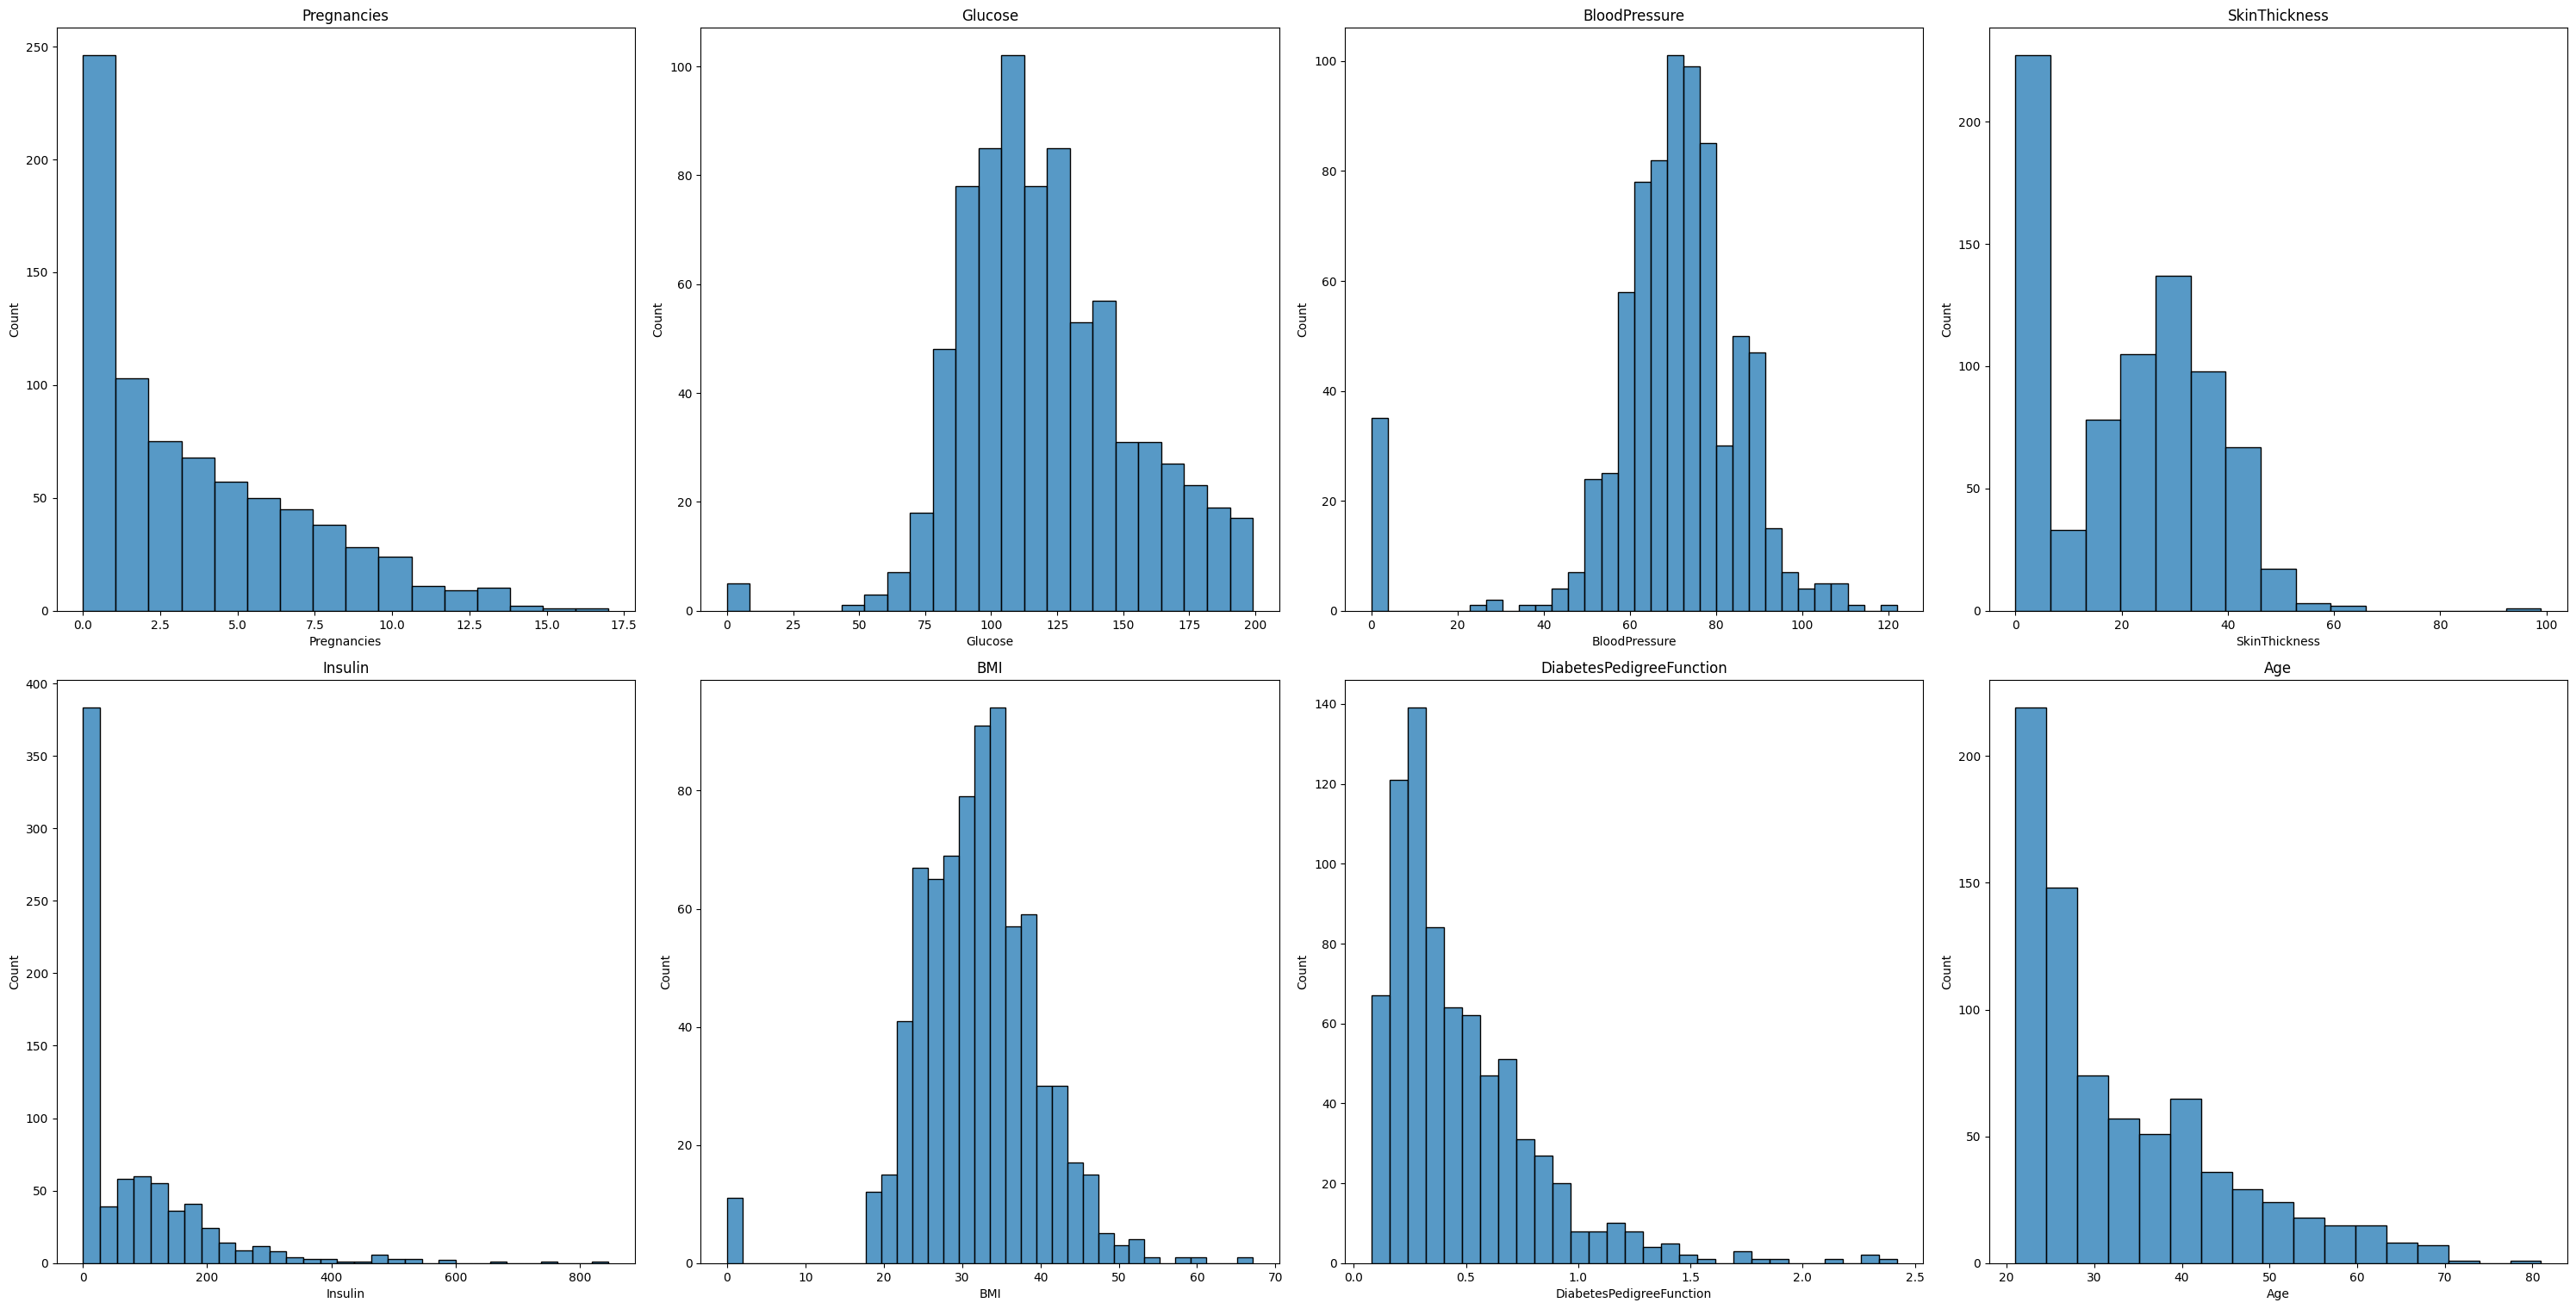

In [20]:
from funciones import funciones_num

lista_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']


funciones_num(df, lista_var) 

#relacion_col_target(df, lista_var) 

Podemos observar que posiblemente haya valores nulos en BloodPressure y BMI, estos valores tan bajos no son compatibles con la vida, por lo tanto hay que cambiarlos. Hare un analisis mas exahustivo mas adelante para comprobarlo.

## Analisis de variables multivariante

Numerico - Numerico

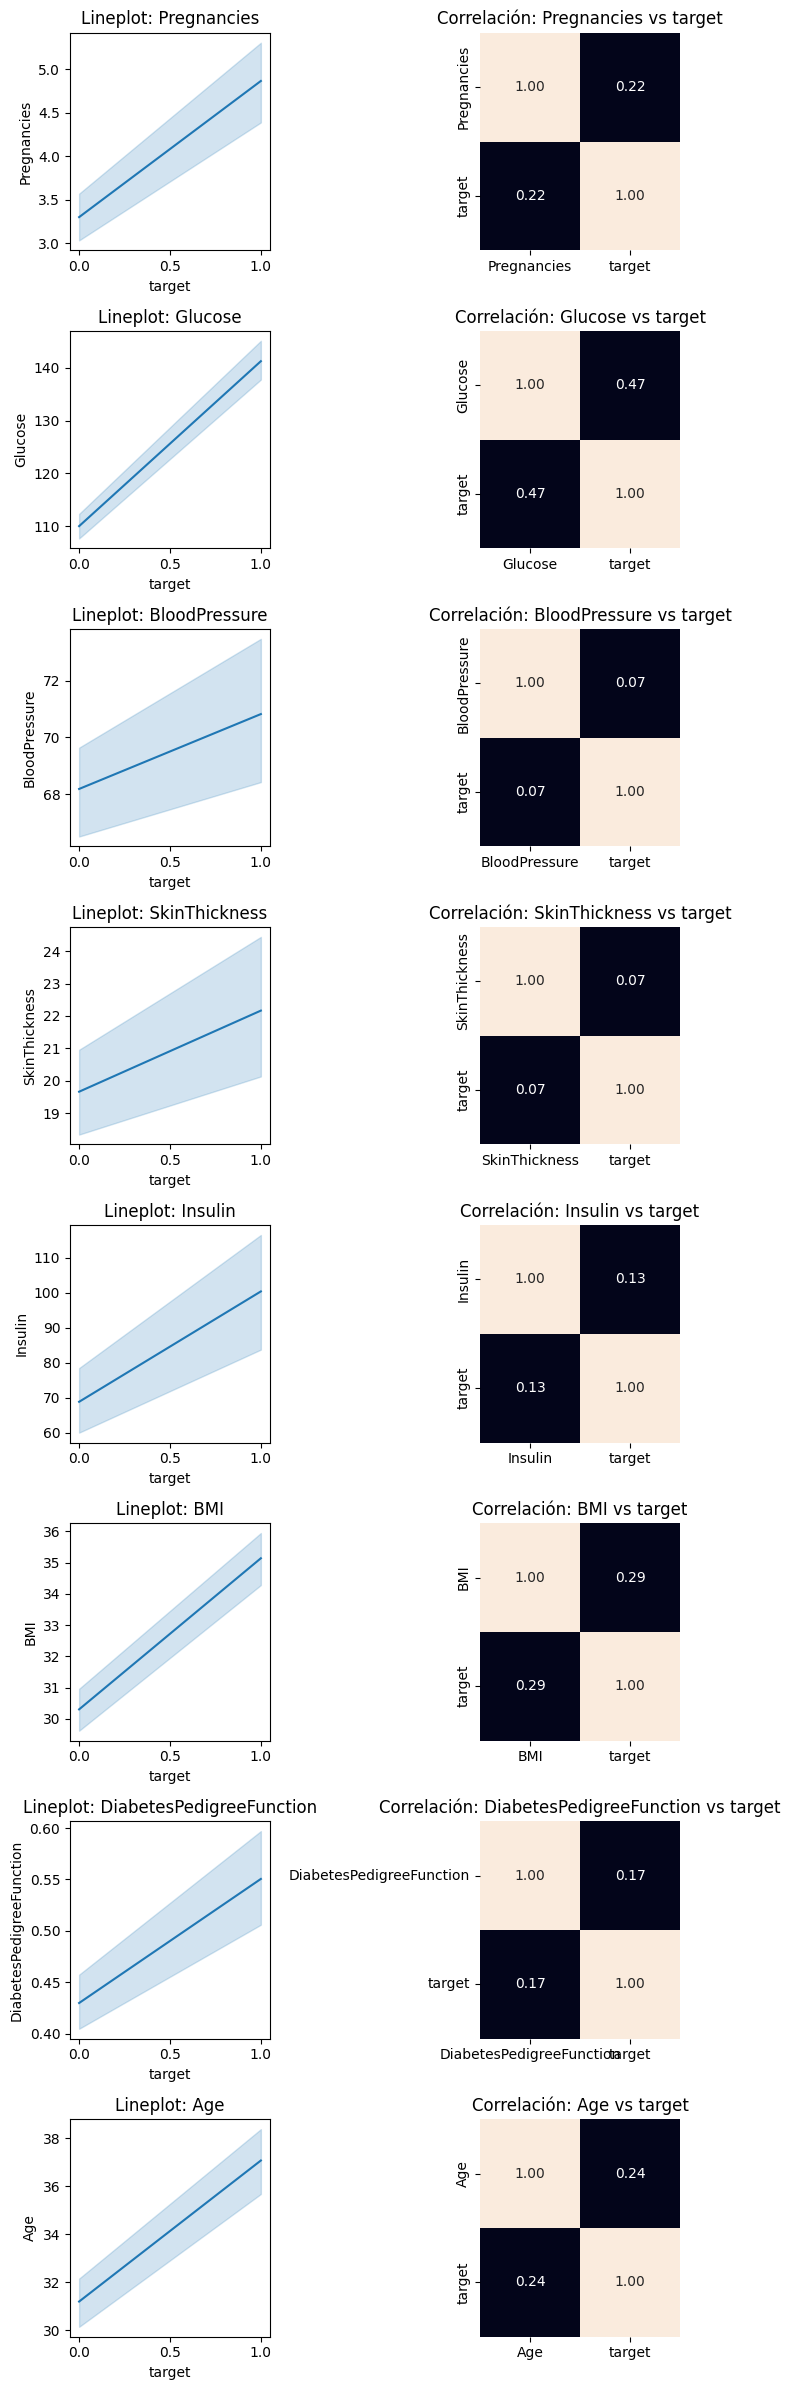

In [21]:
from funciones import relacion_num_target

relacion_num_target(df, lista_var)

Se puede observar que la mayor correlacion sucede entre la columna glucosa y nuestra target, presencia de diabetes. Las que menos correlacion parecen tener son el grosor de la piel y la presion sanguinea.

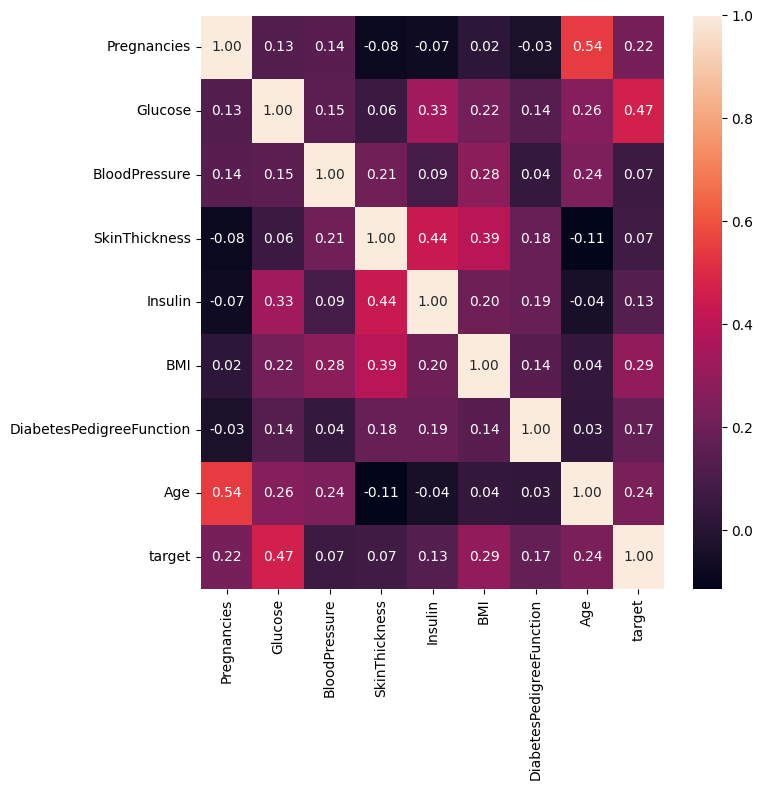

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show() 

Podemos observar que ninguna columna parece tener una correlacion suficientemente alta entre si como para considerarlas redundantes.
Todas las columnas tienen correlaciones entre ellas yu con la target.

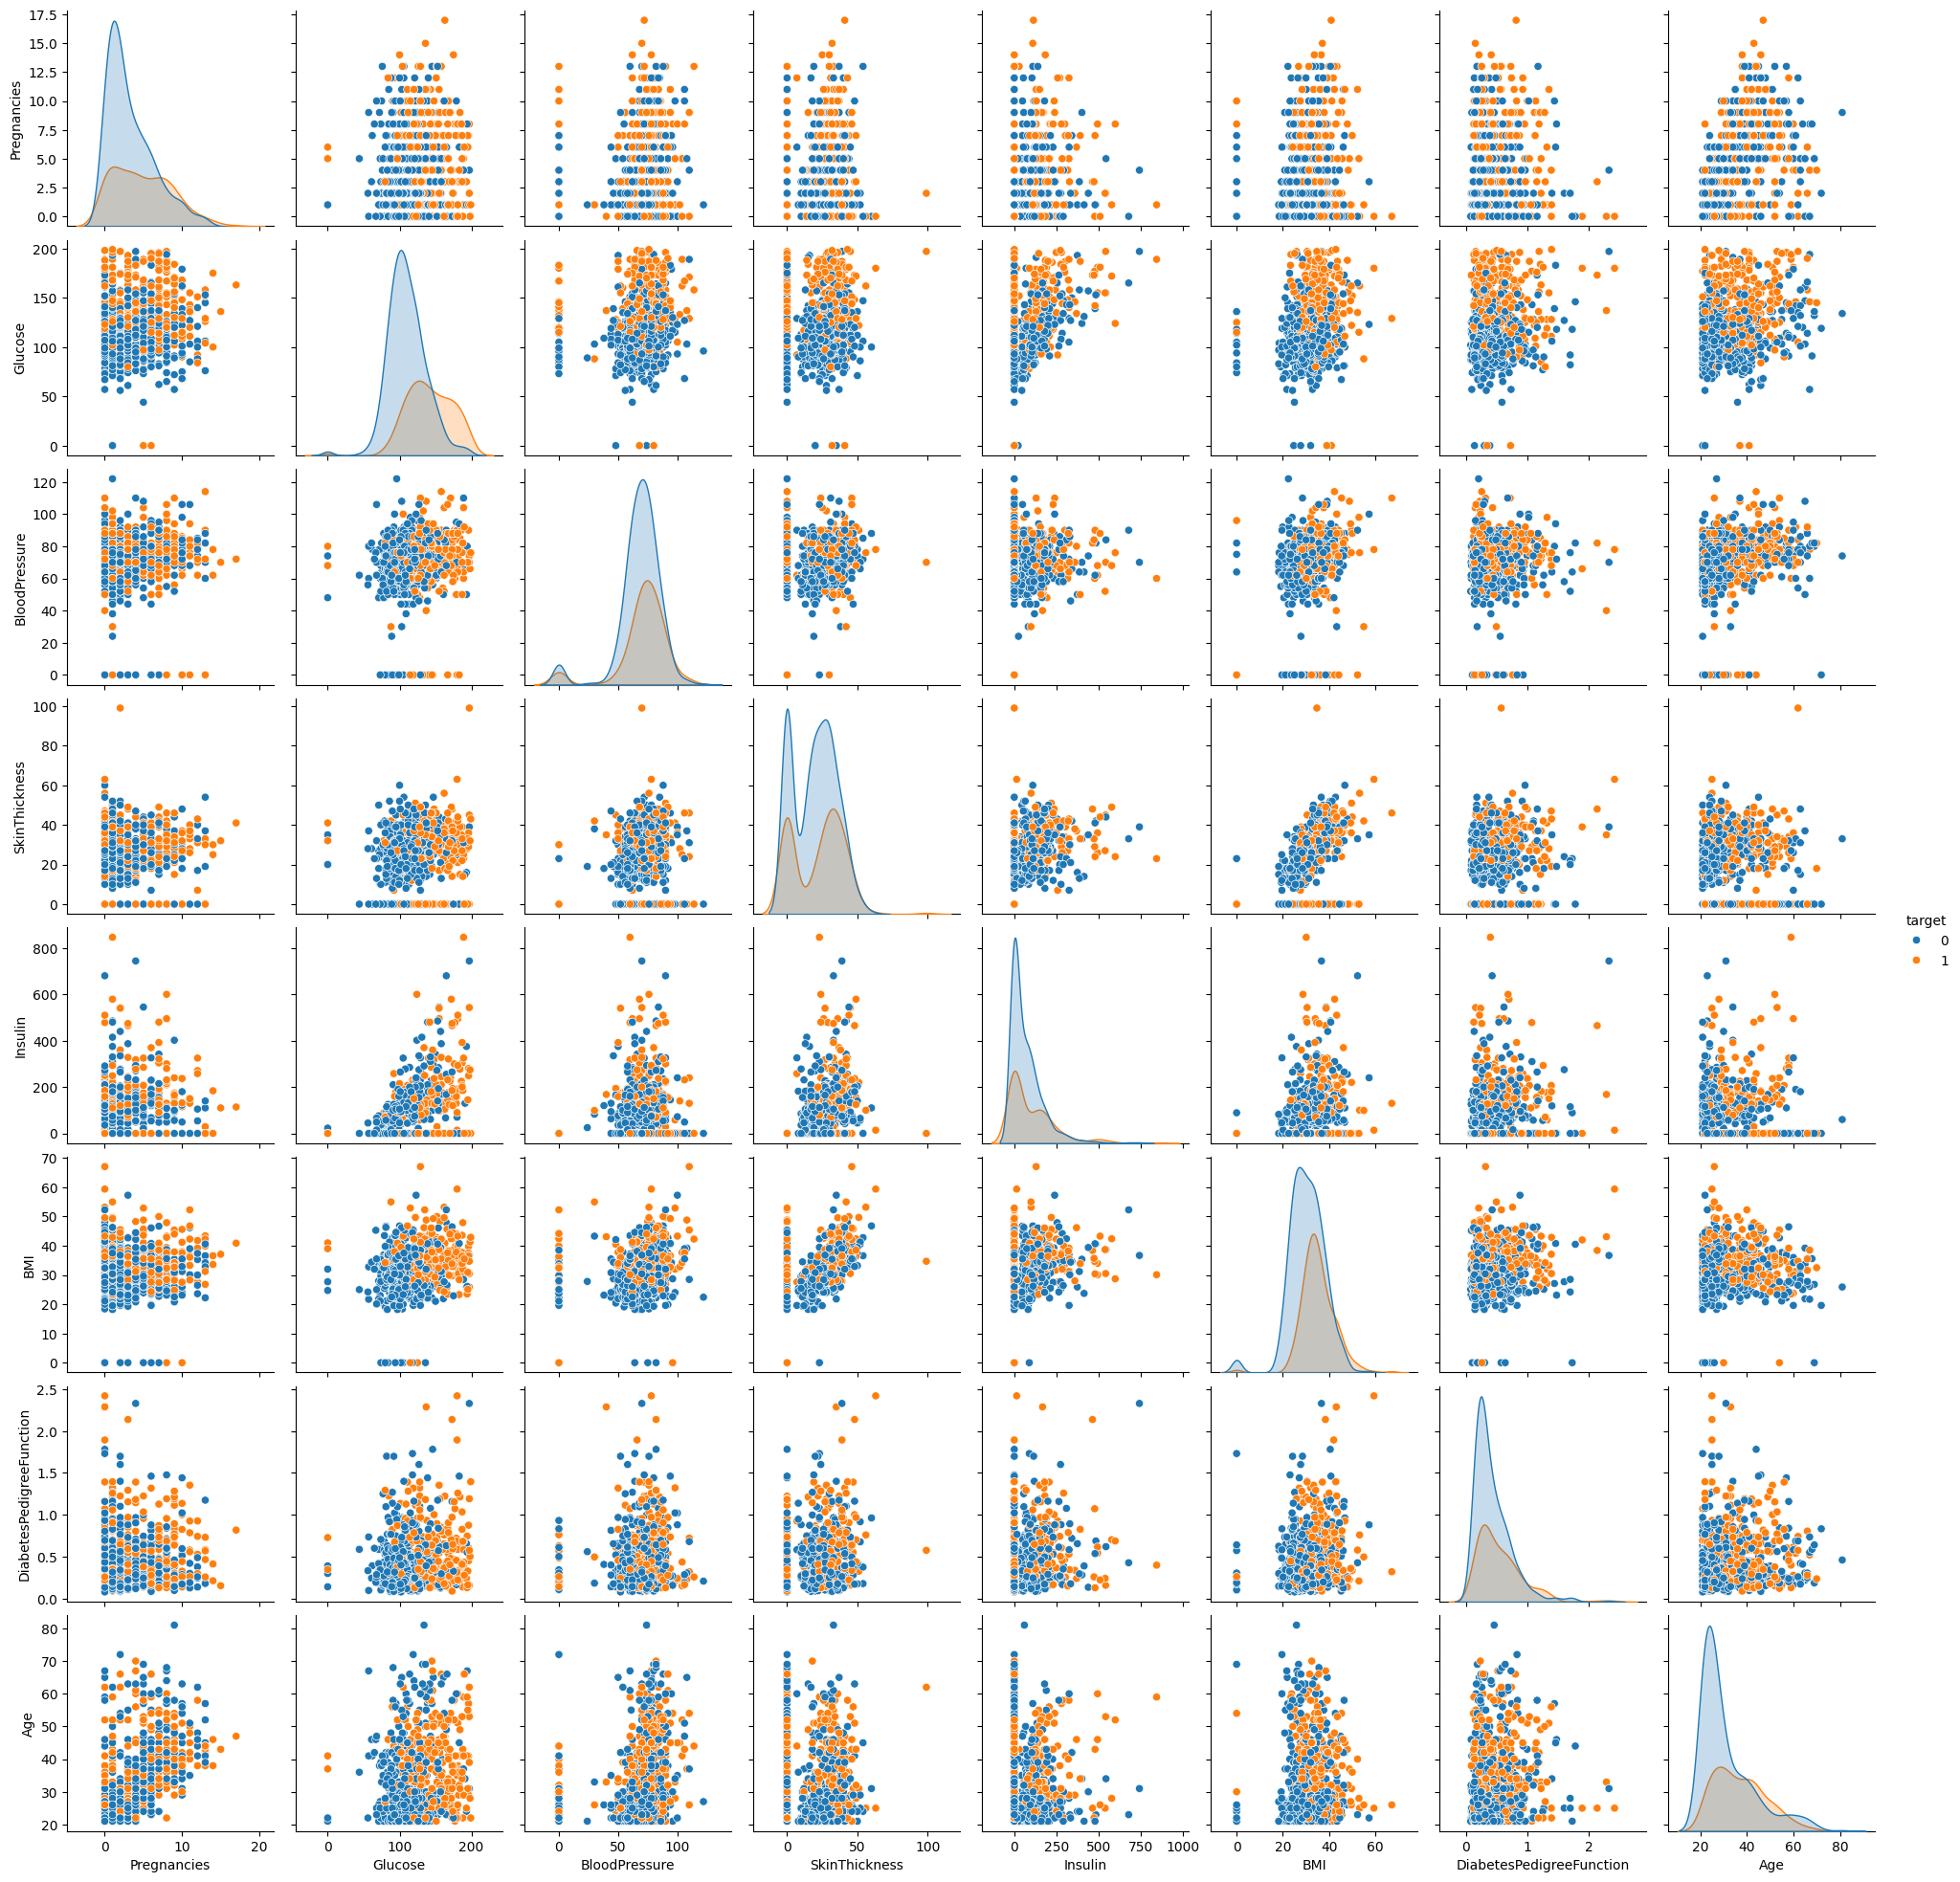

In [23]:
sns.pairplot(data = df, hue="target")

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
target                      0
dtype: int64

# Ingenieria de caracteristicas

# Analisis de outliers

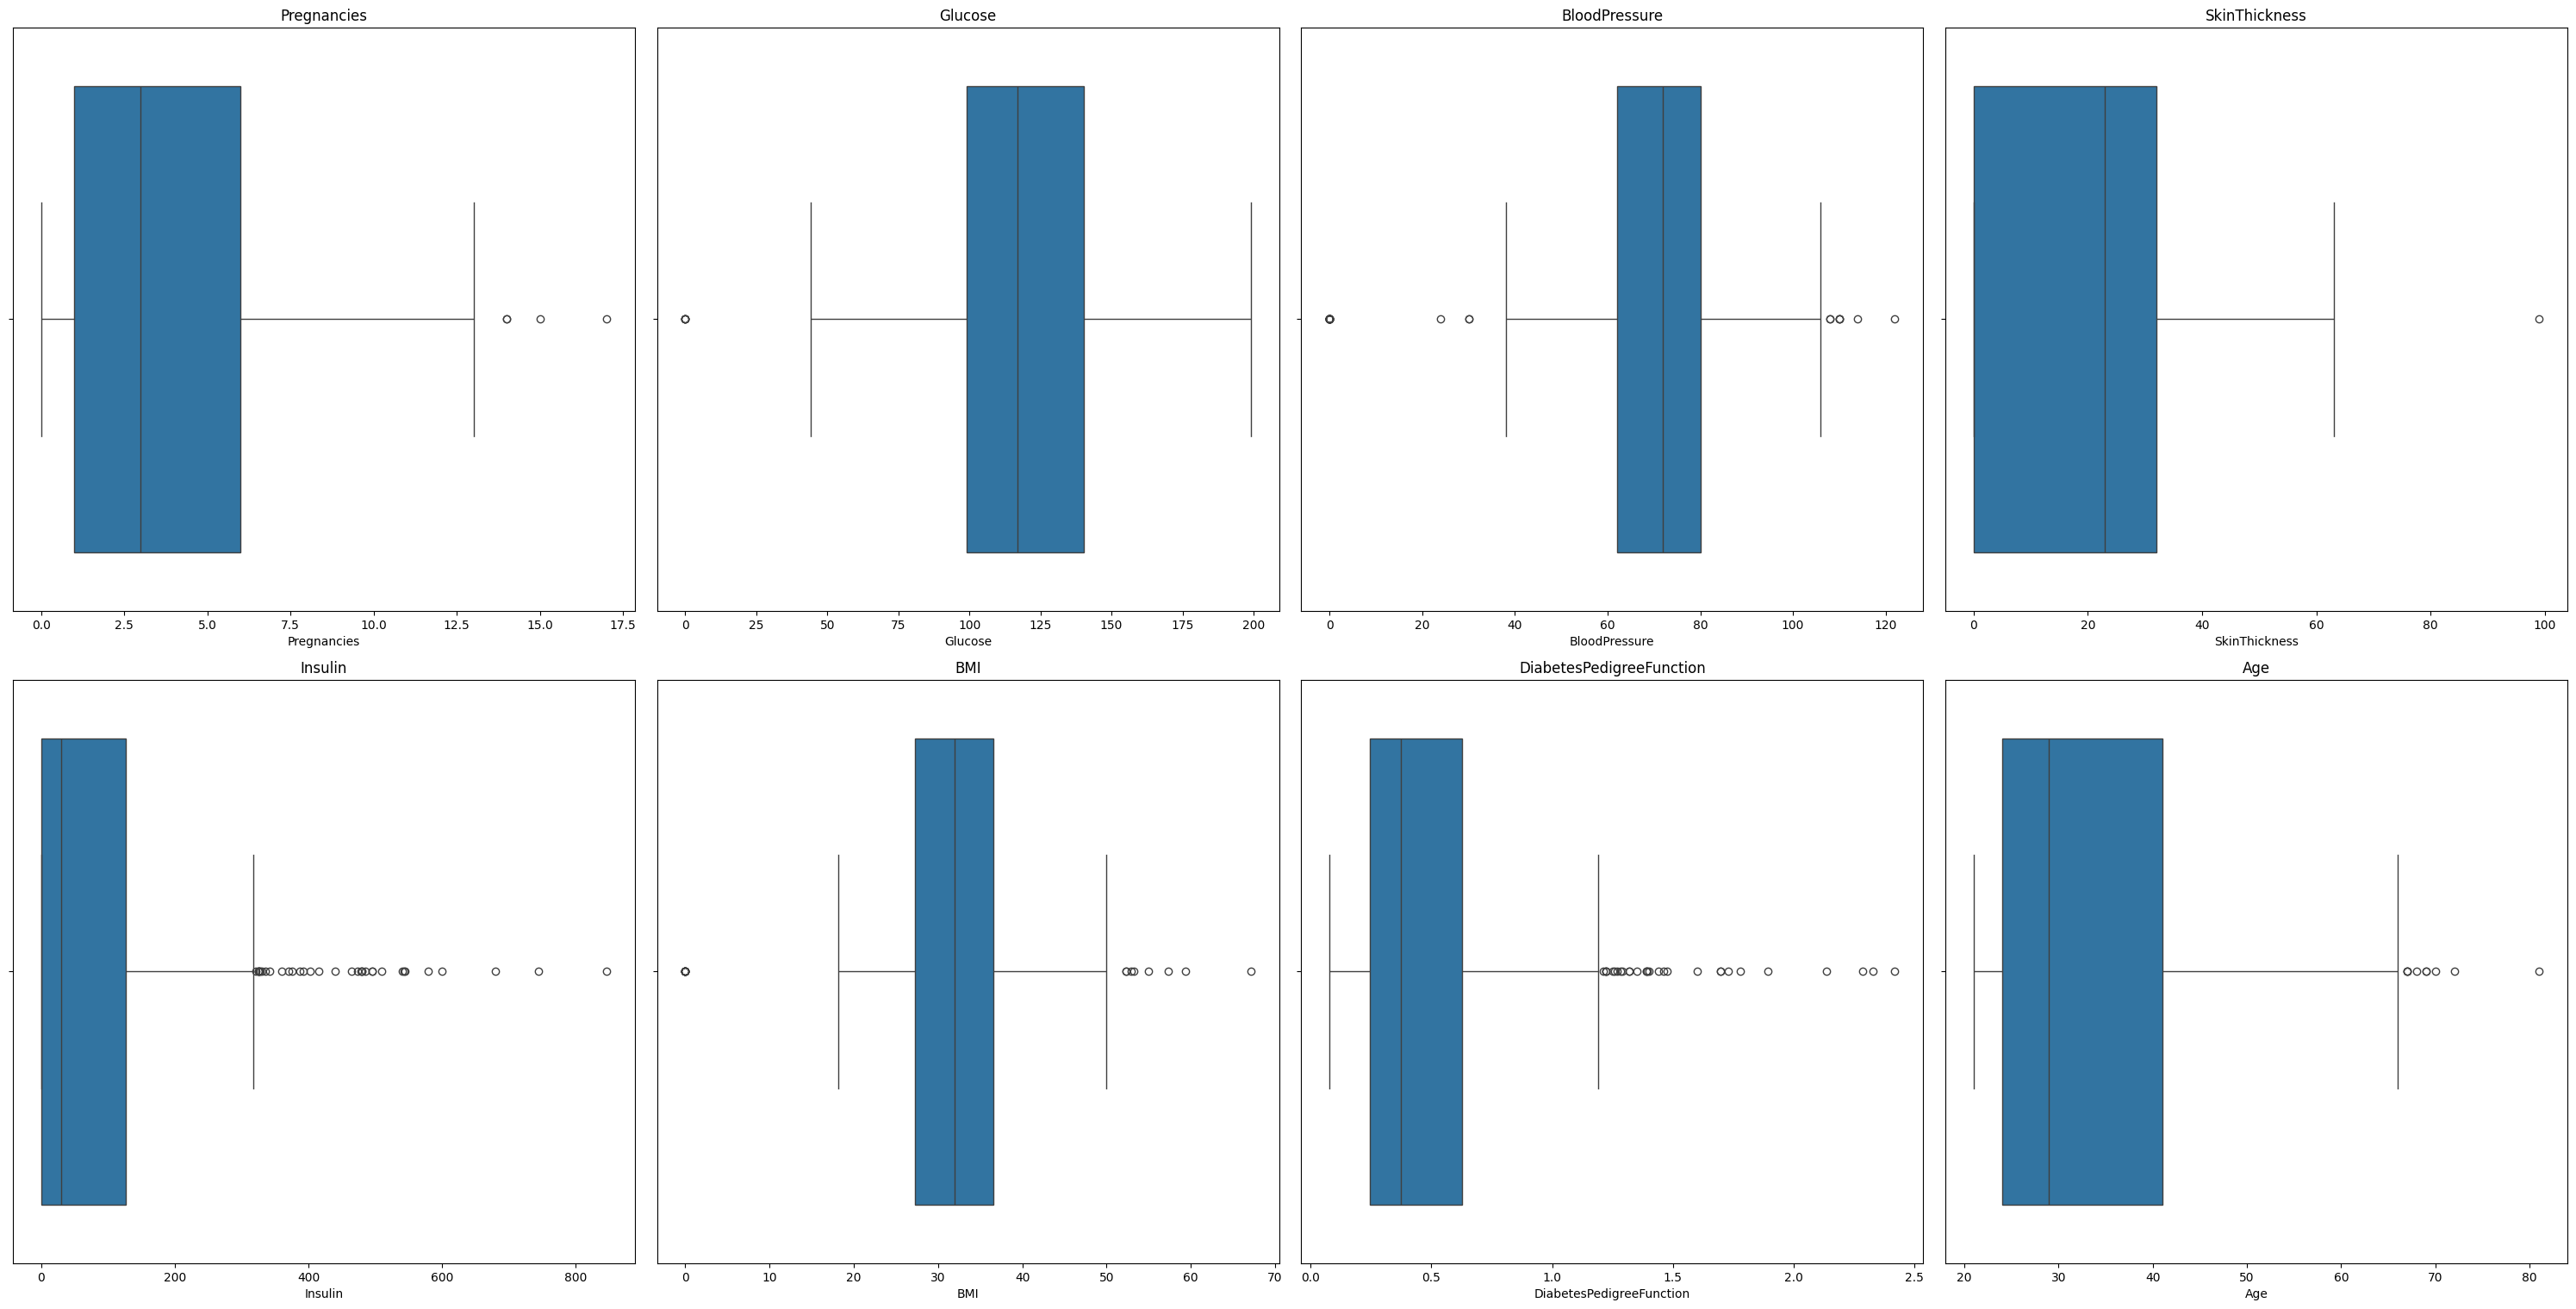

In [26]:
from funciones import analisis_outliers

analisis_outliers(df, lista_var)


Todas mis catgorias tienen outliers. en los casos de blood pressure y de glucosa, estos outliers son los antes mencionados valores nulos, que no serian compatibles con la vida. En insulina si que se detectan outliers, pero en la parte superior de la tabla, estos no son compatibles con la vida, pero si son interesantes para el estudio de la diabetes, dado que son lecturas que se pueden obtener cuando se sufre diabetes.

## Imputacion de valores nulos/erroneos

Voy a sustituir estos valores que no son compatibles con la vida con la media. 

Dado que lo que tengo como target es una variable categorica binomial, que varia entre 0 y 1. Voy a sustituir los valores nulos por la media dependiendo de la media que tengan en la columna 'target' de esta manera mejorara la precision de mi modelo y los datos imputados seran mas precisos.

In [27]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] \
    = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [28]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
target                        0
dtype: int64

In [29]:
missing_var =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [30]:
# Sustituire los datos que faltan por los datos de la media dependiendo de target

def media_var_target(var, dataframe):   
    
    media_df = dataframe[dataframe[var].notnull()]
    
    media_df = media_df[[var, 'target']].groupby(['target'])[[var]].median().reset_index()
    
    return media_df


media_var_target('Glucose', df)

,target,Glucose
0,0,107.0
1,1,140.0


In [31]:
columns = df.columns.drop("target")

for col in columns:
    
    df.loc[(df['target'] == 0 ) & (df[col].isnull()), col] = media_var_target(col, df)[col][0]
    df.loc[(df['target'] == 1 ) & (df[col].isnull()), col] = media_var_target(col, df)[col][1]

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De esta manera, imputo los valores segun el resultado la correlacion que tienen con mi diagnostico, haciendo mis datos mas congruentes.

## Inferencia de nuevas caracteristicas

Voy a crear nuevas caracteristicas que sirvan a mi modelo posteriormente para el entrenamiento.

Creare una nueva caracteristica que defina los valores normales en los que se situa una variable con la insulina y presion sanguinea.

Ademas, creare otra variable BMI/glucose.

Y por ultimo hare binning con el BMI y la glucosa

Insulina Status

In [33]:
# Categoria insulina
df['Insulin_Status'] = np.where((df['Insulin'] >= 16) & (df['Insulin'] <= 166), "Normal", "Abnormal")

Presion Sanguinea Status

In [34]:
# Categoria presion sanguinea
conditions = [
    (df['BloodPressure'] < 60),
    (df['BloodPressure'] >= 60) & (df['BloodPressure'] < 90),
    (df['BloodPressure'] >= 90)
]

categories = ['Hypotension', 'Normal', 'Hypertension']

df['BloodPressure_Category'] = np.select(conditions, categories, default='Unknown')

Binning Glucosa

In [35]:
# Categoria Glucosa
conditions = [
    (df['Glucose'] < 70),
    (df['Glucose'] >= 70) & (df['Glucose'] < 140),
    (df['Glucose'] >= 140) & (df['Glucose'] < 200),
    (df['Glucose'] >= 200)
]

categories = ['Hypoglycemia', 'Normal', 'Prediabetes', 'Diabetes']

df['Glucose_Category'] = np.select(conditions, categories, default='Unknown')

Binning BMI

In [36]:
# Categoria BMI
conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30)
]

categories = ['Underweight', 'Normal', 'Sobrepeso', 'Obesidad']

df['BMI_Category'] = np.select(conditions, categories, default='Unknown')

BMI/Glucosa

In [37]:
df['BMI/glucose'] = df['BMI'] / df['Glucose']

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target,BMI/glucose
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958,0.280244
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951,0.083027
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.121134
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000,0.219335
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000,0.266533
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000,0.327088
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,0.676119


Una vez hecho esto, procedere con el OneHotEncoding de las nuevas columnas que he creado para convertirlas en numericas.

## Preparacion Datasets para ML

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

### One Hot Encoding

In [40]:
from funciones import onehot_encode_and_pickle

cat_var = ['Insulin_Status','BloodPressure_Category','Glucose_Category', 'BMI_Category']

df_transformed, encoder = onehot_encode_and_pickle(df, cat_var, encoder_filename='encoder.pkl', drop_original=True, drop_first=True)

# Para ver las equivalencias de cada variable:
print(encoder.categories_)

[array(['Abnormal', 'Normal'], dtype=object), array(['Hypertension', 'Hypotension', 'Normal'], dtype=object), array(['Hypoglycemia', 'Normal', 'Prediabetes'], dtype=object), array(['Normal', 'Obesidad', 'Sobrepeso', 'Underweight'], dtype=object)]


In [41]:
df_transformed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target,BMI/glucose,Insulin_Status_Normal,BloodPressure_Category_Hypotension,BloodPressure_Category_Normal,Glucose_Category_Normal,Glucose_Category_Prediabetes,BMI_Category_Obesidad,BMI_Category_Sobrepeso,BMI_Category_Underweight
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0.227027,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0.312941,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0.127322,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0.315730,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0.314599,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Reemplazo de Outliers

In [42]:
from funciones import reemplazar_outliers

cat_var = ['Insulin_Status_Normal', 'BloodPressure_Category_Hypotension', 'BloodPressure_Category_Normal', 'Glucose_Category_Normal', 
           'Glucose_Category_Prediabetes', 'BMI_Category_Obesidad', 'BMI_Category_Sobrepeso', 'target']

y = df_transformed['target']

X_con_outliers_num = df_transformed.drop(columns=cat_var).copy()
X_sin_outliers_num = df_transformed.drop(columns=cat_var).copy()

# Para la versión SIN outliers (se reemplazan los outliers en las columnas numéricas)
outliers_dict = {}
for col in X_sin_outliers_num.columns:
    X_sin_outliers_num, limits = reemplazar_outliers(col, X_sin_outliers_num)
    outliers_dict[col] = limits

# Guardamos la información de reemplazo de outliers en JSON (convertida a tipos nativos)
outliers_dict_serializable = {col: [float(l), float(u)] for col, (l, u) in outliers_dict.items()}
with open("../data/outliers_replacement.json", "w") as f:
    json.dump(outliers_dict_serializable, f)

In [43]:
# Concateno las numericas y OneHotEncoding
numeric_cols = df_transformed.select_dtypes(include=[np.object_]).columns

df_cat = df_transformed.drop(numeric_cols)

df_cat.drop('target', axis=1, inplace=True)

X_con_outliers = pd.concat([X_con_outliers_num, df_cat], axis=1)
X_sin_outliers = pd.concat([X_sin_outliers_num, df_cat], axis=1)

## Division Train/Test

In [44]:
X_train_con_raw, X_test_con_raw, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42, stratify=y)

X_train_con_raw.to_excel("../data/processed/X_train_con_outliers_raw.xlsx", index=False)
X_test_con_raw.to_excel("../data/processed/X_test_con_outliers_raw.xlsx", index=False)

# Para la versión SIN outliers usamos los mismos índices
X_train_sin_raw = X_sin_outliers.loc[X_train_con_raw.index]
X_test_sin_raw  = X_sin_outliers.loc[X_test_con_raw.index]


# Guardamos los targets por separado
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)

## Exportado de datos

In [45]:
# Versión CON outliers:
# - RAW: X_train_con_outliers_raw_oh.xlsx y X_test_con_outliers_raw_oh.xlsx
X_train_con_raw.to_excel("../data/processed/X_train_con_outliers_raw.xlsx", index=False)
X_test_con_raw.to_excel("../data/processed/X_test_con_outliers_raw.xlsx", index=False)

# Versión SIN outliers:
# - RAW: X_train_sin_outliers_raw_oh.xlsx y X_test_sin_outliers_raw_oh.xlsx
X_train_sin_raw.to_excel("../data/processed/X_train_sin_outliers_raw.xlsx", index=False)
X_test_sin_raw.to_excel("../data/processed/X_test_sin_outliers_raw.xlsx", index=False)

# Chequeo de datos
X_train_con_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI/glucose,BMI_Category_Underweight,...,Age,BMI/glucose,Insulin_Status_Normal,BloodPressure_Category_Hypotension,BloodPressure_Category_Normal,Glucose_Category_Normal,Glucose_Category_Prediabetes,BMI_Category_Obesidad,BMI_Category_Sobrepeso,BMI_Category_Underweight
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24,0.302222,0.0,...,24,0.302222,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40,0.234921,0.0,...,40,0.234921,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25,0.332381,0.0,...,25,0.332381,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
46,1,146.0,56.0,27.0,102.5,29.7,0.564,29,0.203425,0.0,...,29,0.203425,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0.469474,0.0,...,22,0.469474,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
